In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

### Data Reading

In [272]:
df = pd.read_csv("train.csv", encoding='latin-1')
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_18848\3948136214.py:1: DtypeWarning: Columns (6,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv", encoding='latin-1')


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,NaN,NaN,NaN,NaN,NaN,NaN
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,NaN,NaN,NaN,NaN,NaN,NaN
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,NaN,NaN,NaN,NaN,NaN,NaN
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,NaN,NaN,NaN,NaN,NaN,NaN


### There is some "mismatched rows" are presented, that's why here showing some "unnamed columns"
#### Removing that one first of all

In [273]:
i = 0
for x in df["Unnamed: 12"].isna():
    if not x:
        df = df.drop(i)
    i += 1
    
df = df.iloc[:, :12]
df = df.dropna(subset=['winery'])
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


### Data Type Conversion

In [274]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].astype(float)

df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['points'] = df['points'].astype(float)

### Statistical Presentation

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82649 entries, 0 to 82664
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63257 non-null  object 
 1   country             82614 non-null  object 
 2   review_title        82649 non-null  object 
 3   review_description  82649 non-null  object 
 4   designation         59004 non-null  object 
 5   points              82649 non-null  float64
 6   price               77080 non-null  float64
 7   province            82614 non-null  object 
 8   region_1            69899 non-null  object 
 9   region_2            35945 non-null  object 
 10  winery              82649 non-null  object 
 11  variety             82649 non-null  object 
dtypes: float64(2), object(10)
memory usage: 8.2+ MB


In [276]:
df.describe()

,points,price
count,82649.000000,77080.000000
mean,88.544556,36.923793
std,3.099736,43.700282
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [277]:
df.isnull().sum()

user_name             19392
country                  35
review_title              0
review_description        0
designation           23645
points                    0
price                  5569
province                 35
region_1              12750
region_2              46704
winery                    0
variety                   0
dtype: int64

# <font color="Blue">Graph Plotting</font>

### <font color="Green">1. Graph based on Non-Null Values</font>

<AxesSubplot: >

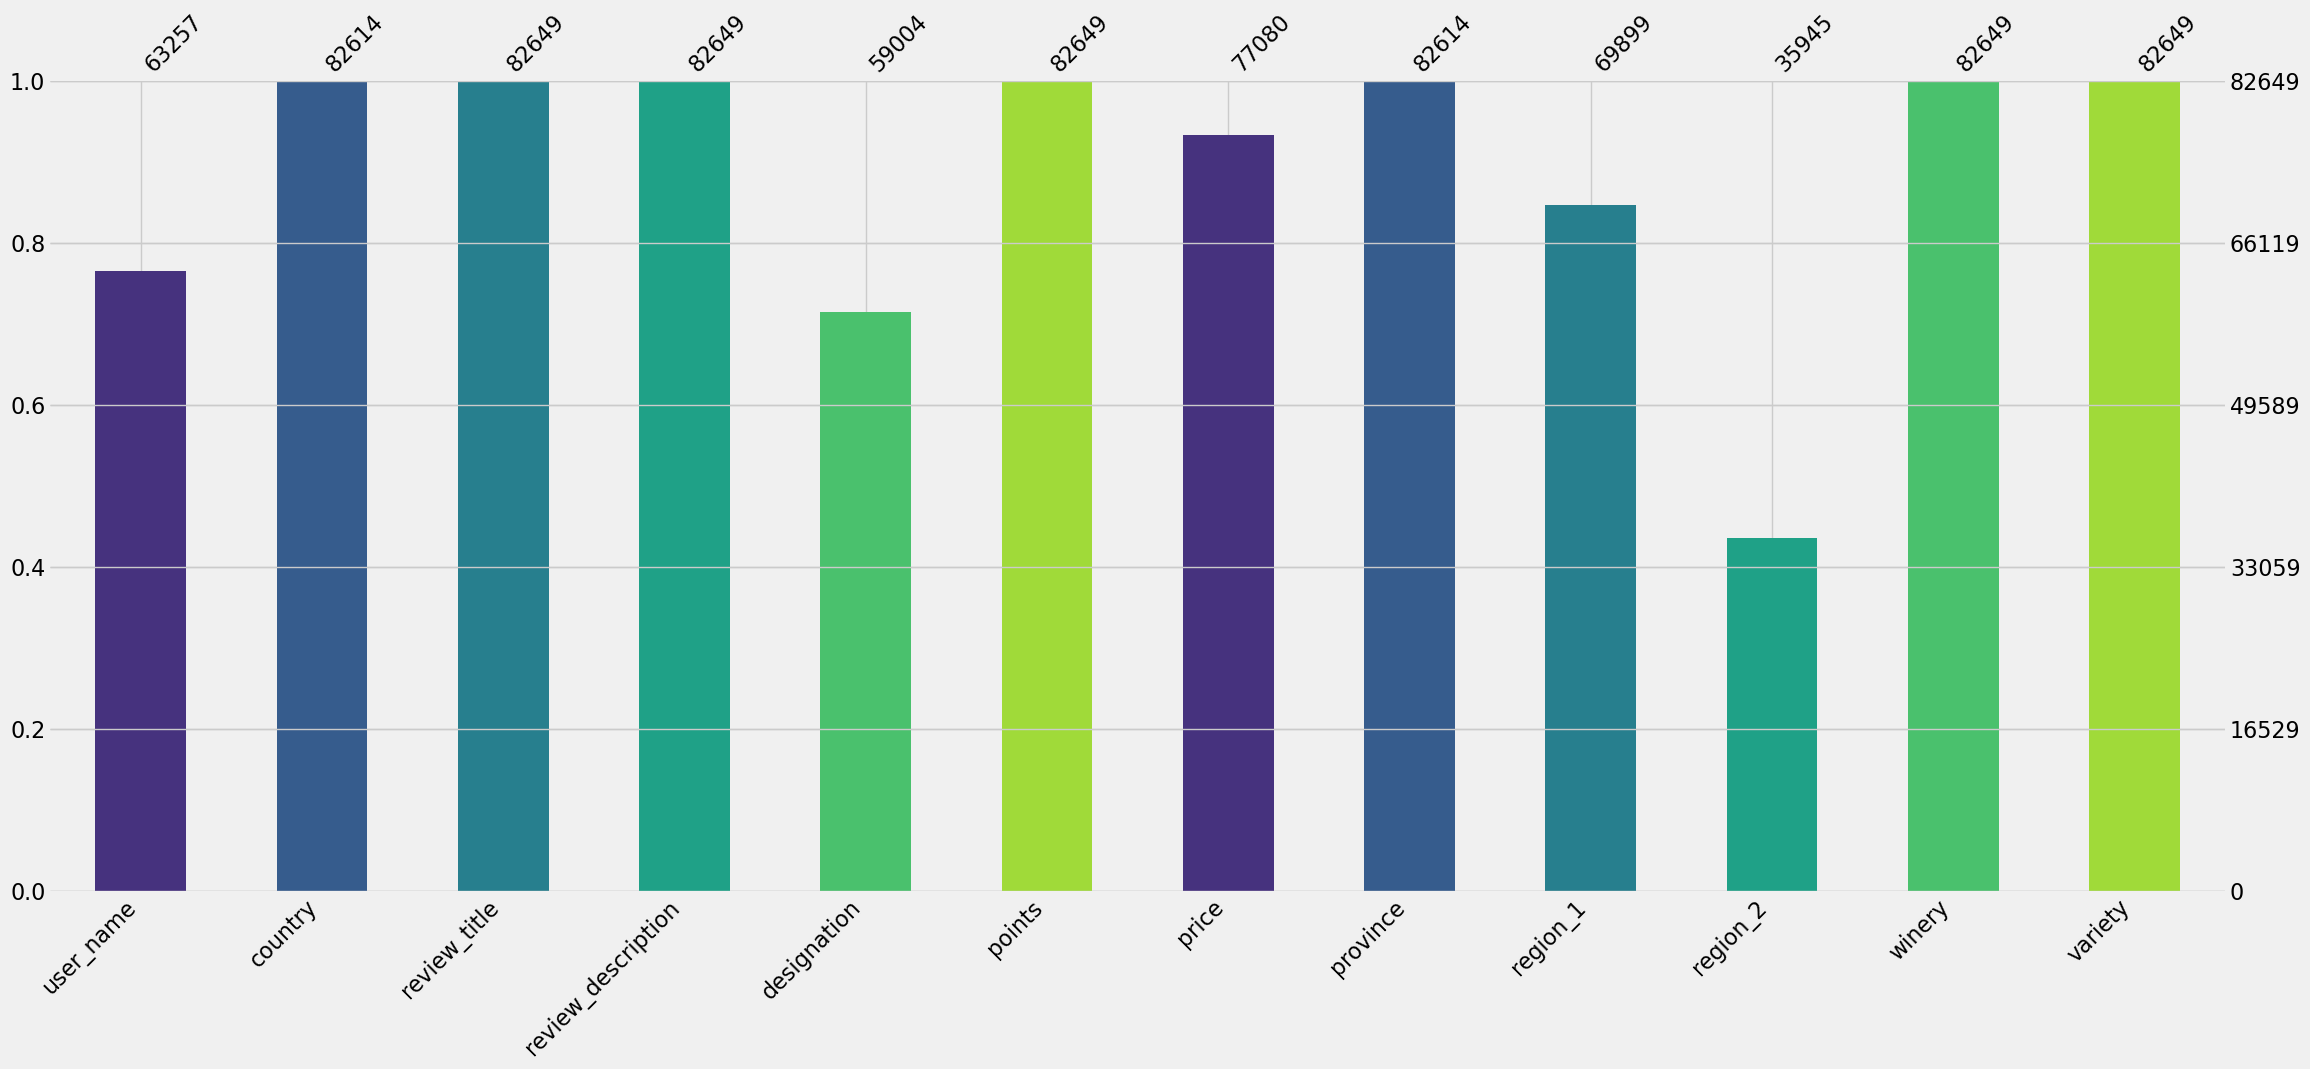

In [278]:
msno.bar(df,color= sns.color_palette('viridis'))

### <font color="Green">2. Graph based on User Count Values</font>

           count unique         top   freq
user_name  63257     15  @vossroger  17539


<AxesSubplot: xlabel='count', ylabel='user_name'>

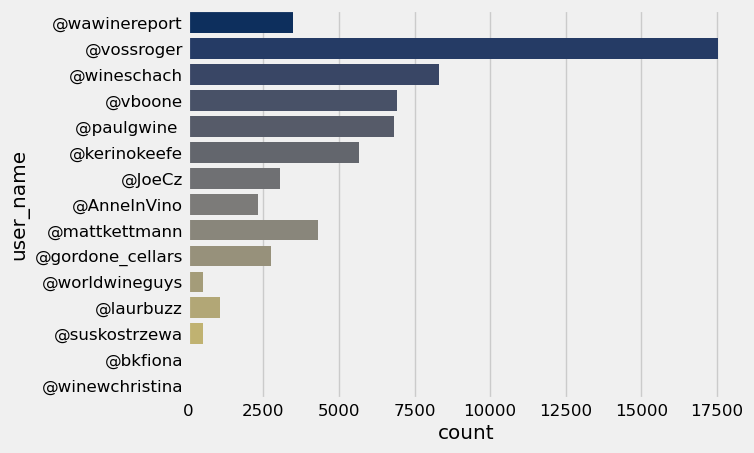

In [279]:
print(df[['user_name']].describe().T)

sns.countplot(y = df['user_name'], palette = 'cividis')


### <font color="Green">3. Distribution of Wine Reviews by Top 30 Countries</font>

Number of country list in data: 38


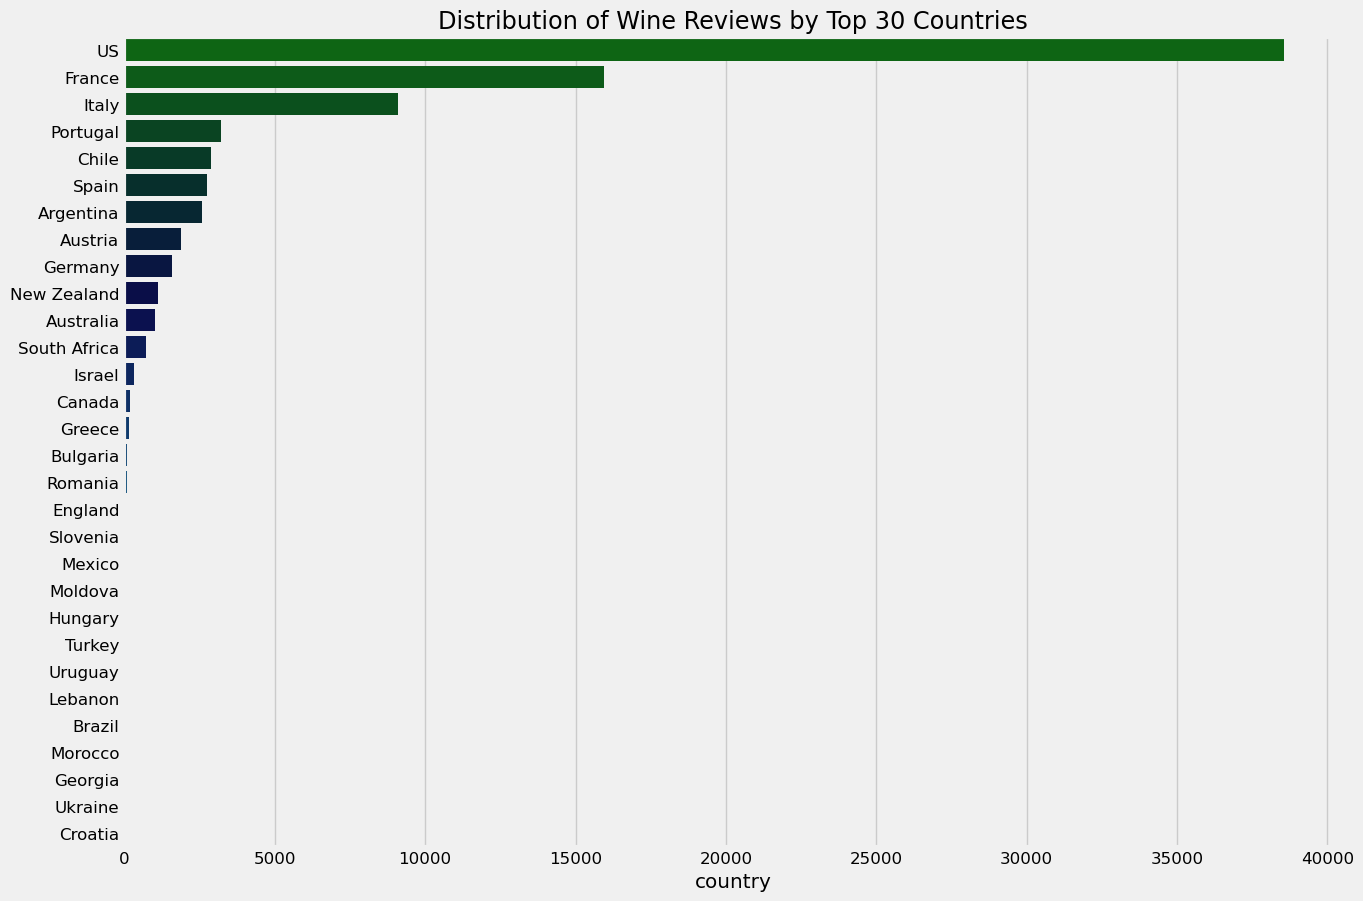

In [280]:
print('Number of country list in data:',df['country'].nunique())
plt.figure(figsize=(14,10))
cnt = df['country'].value_counts().to_frame()[0:30]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 30 Countries');

### <font color="Green">4. Country wise average wine price</font>

C:\Users\USER\AppData\Local\Temp\ipykernel_18848\2488143310.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = df.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()


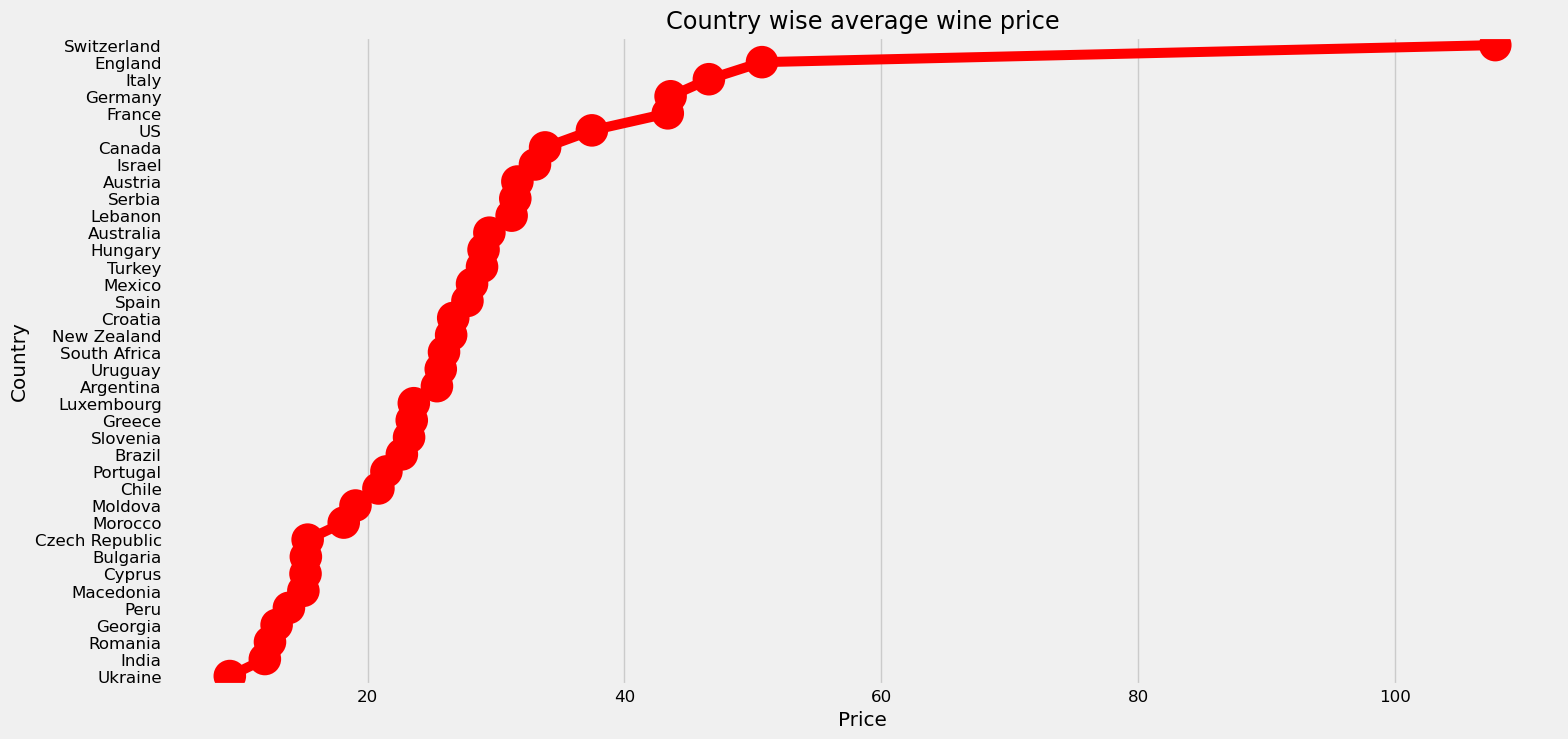

In [281]:
cnt = df.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

### <font color="Green">5. Country wise average wine ratting</font>

C:\Users\USER\AppData\Local\Temp\ipykernel_18848\2435015594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt = df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()


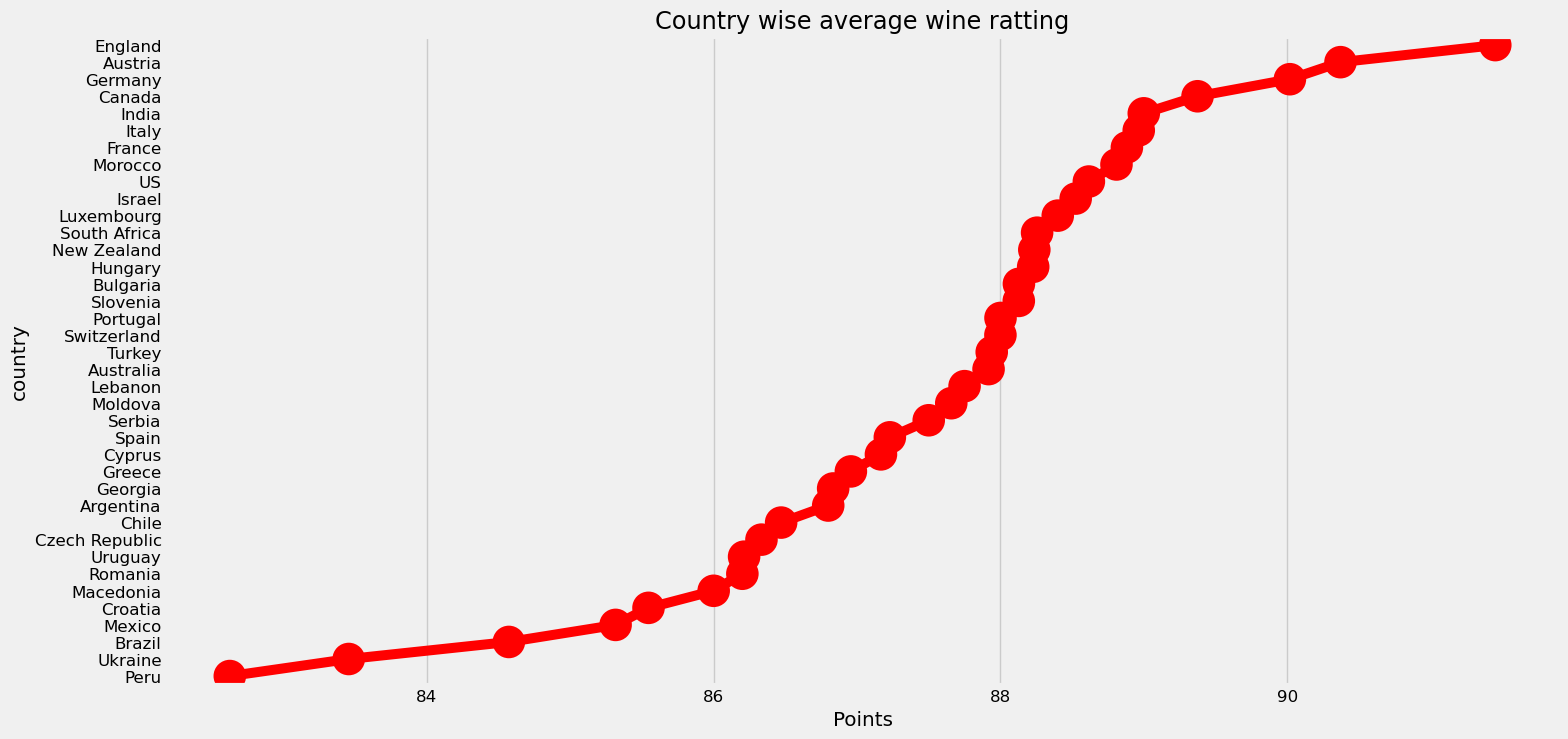

In [282]:
cnt = df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

### <font color="Green">6. Graph based on Most expensive wine in country and Least price wine by country</font>

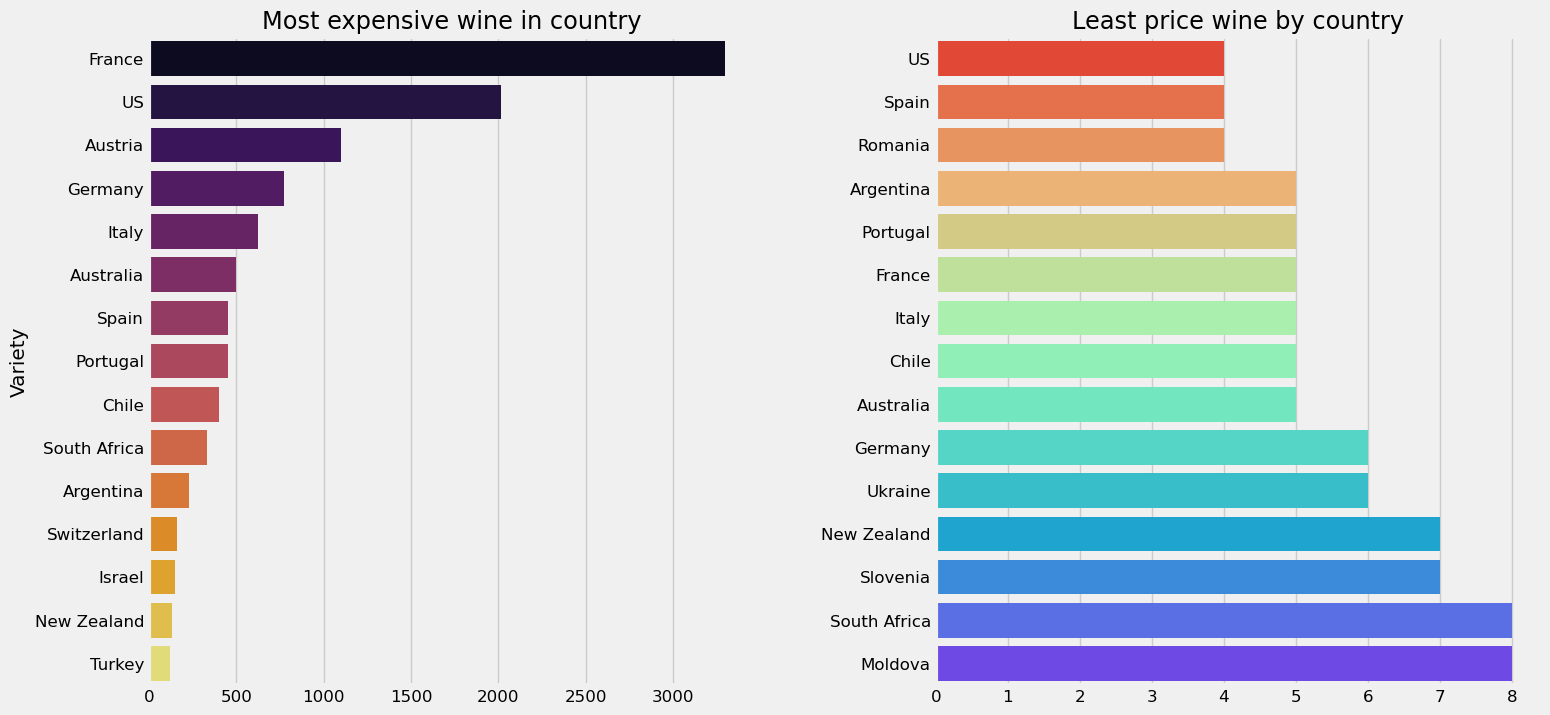

In [283]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

### <font color="Green">7. Country Of Wine Origin Count</font>

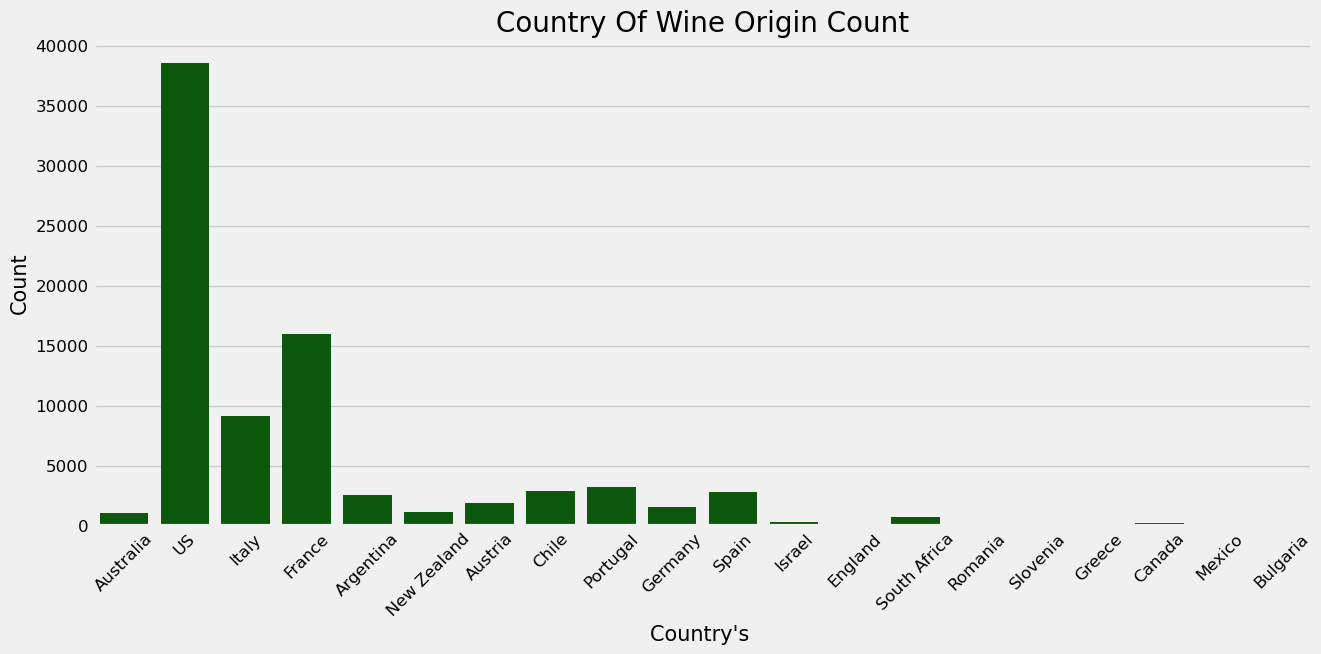

In [284]:
plt.figure(figsize=(14,6))

country = df.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df[df.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

### <font color="Green">8. Most expensive wine prepared in the Designation and Most rated wine prepared in the Designation</font>

Number of vineyard designation 26419


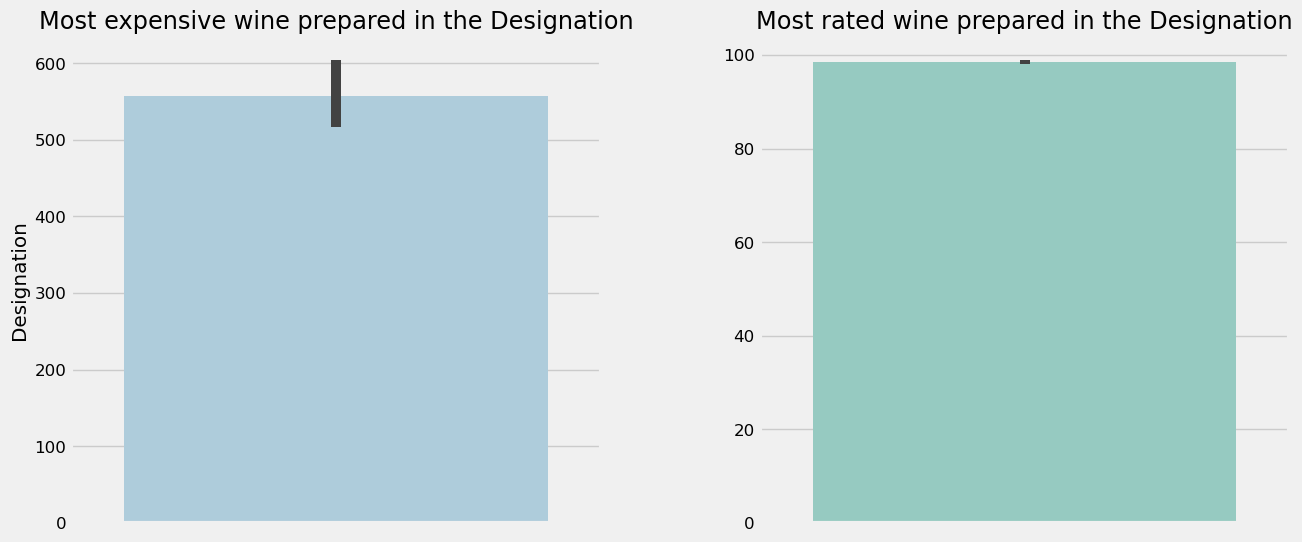

In [285]:
print('Number of vineyard designation',df['designation'].nunique())
cnt = df.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:15]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Designation')
ax1.set_title('Most expensive wine prepared in the Designation')

cnt = df.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most rated wine prepared in the Designation')
plt.subplots_adjust(wspace=0.3)

### <font color="Green">9. Points Count distribuition</font>

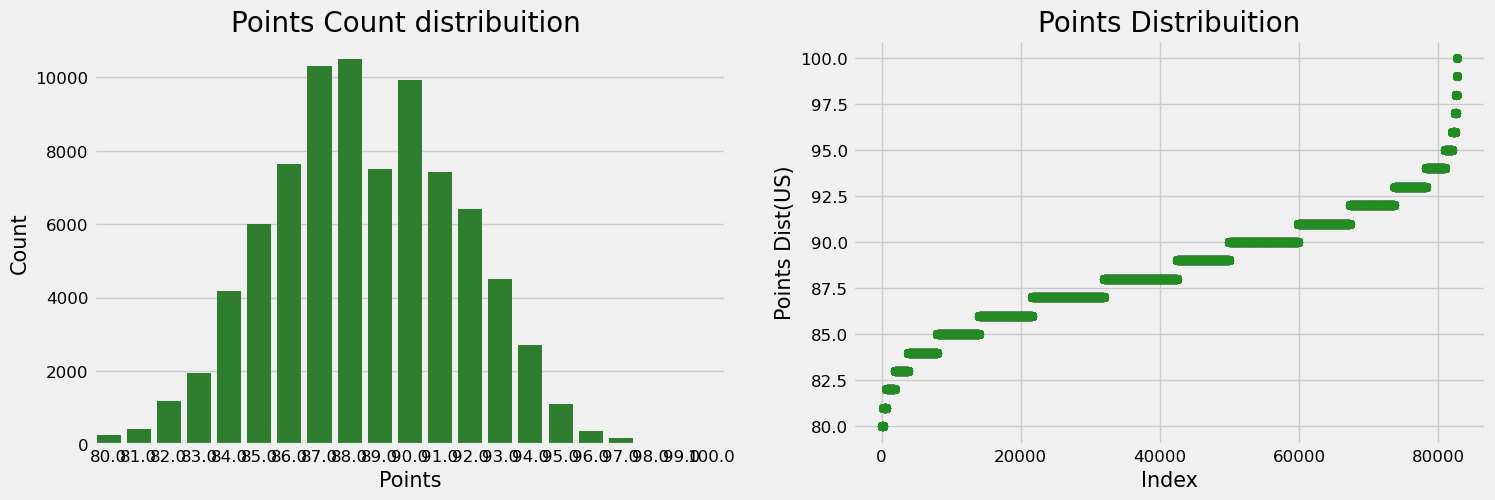

In [286]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) 
g = sns.countplot(x='points', data=df, color='forestgreen')
g.set_title("Points Count distribuition ", fontsize=20)
g.set_xlabel("Points", fontsize=15) 
g.set_ylabel("Count", fontsize=15) 

plt.subplot(1,2,2)  #
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='forestgreen') 
plt.xlabel('Index', fontsize=15)  
plt.ylabel('Points Dist(US)', fontsize=15)  
plt.title("Points Distribuition", fontsize=20) 

plt.show()


### <font color="Green">10. Most rated wine in country and Least rated wine by country</font>

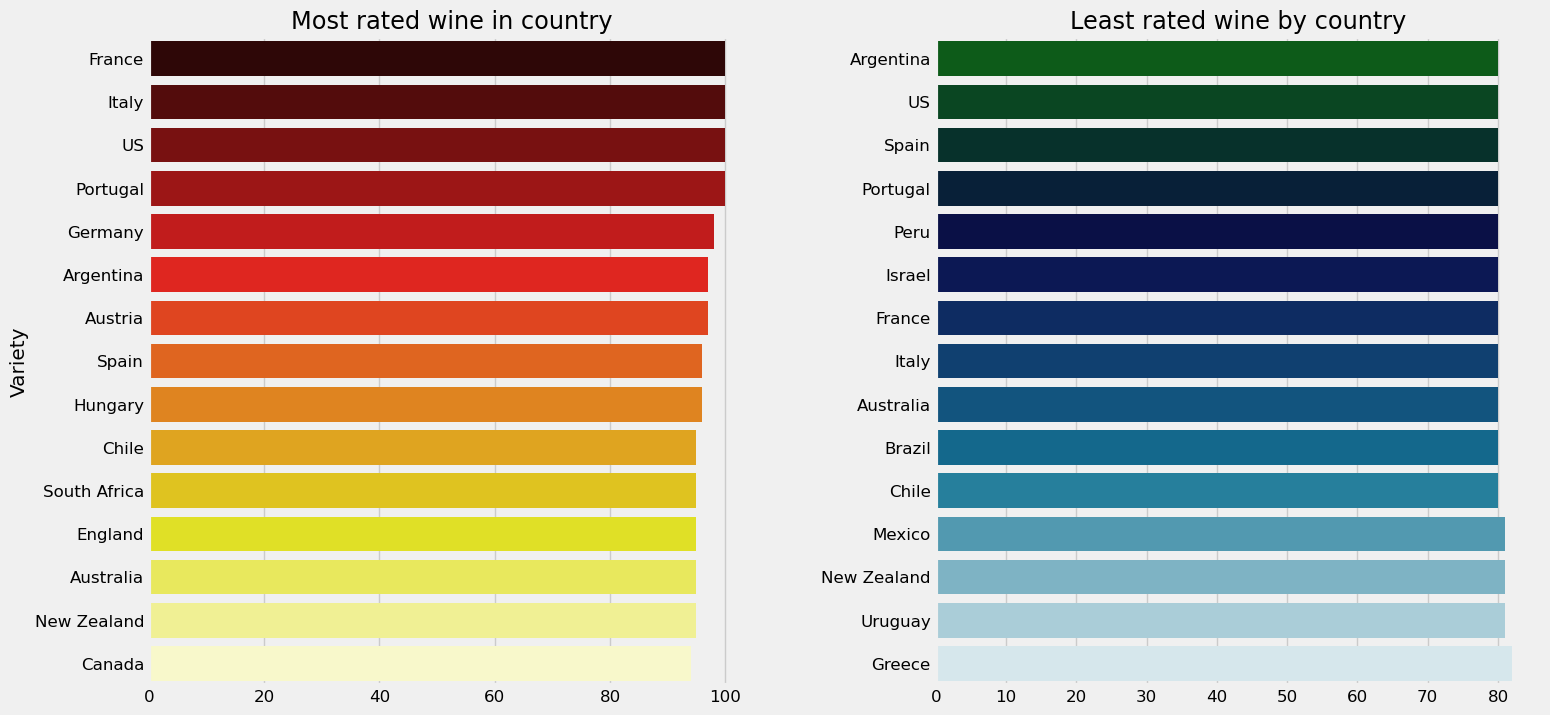

In [287]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

### <font color="Green">11. Distrbution of price</font>

C:\Users\USER\AppData\Local\Temp\ipykernel_18848\223124050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'].fillna(df['price'].mean()),color='r',ax=ax1)


Text(0.5, 1.0, 'Boxplot of price')

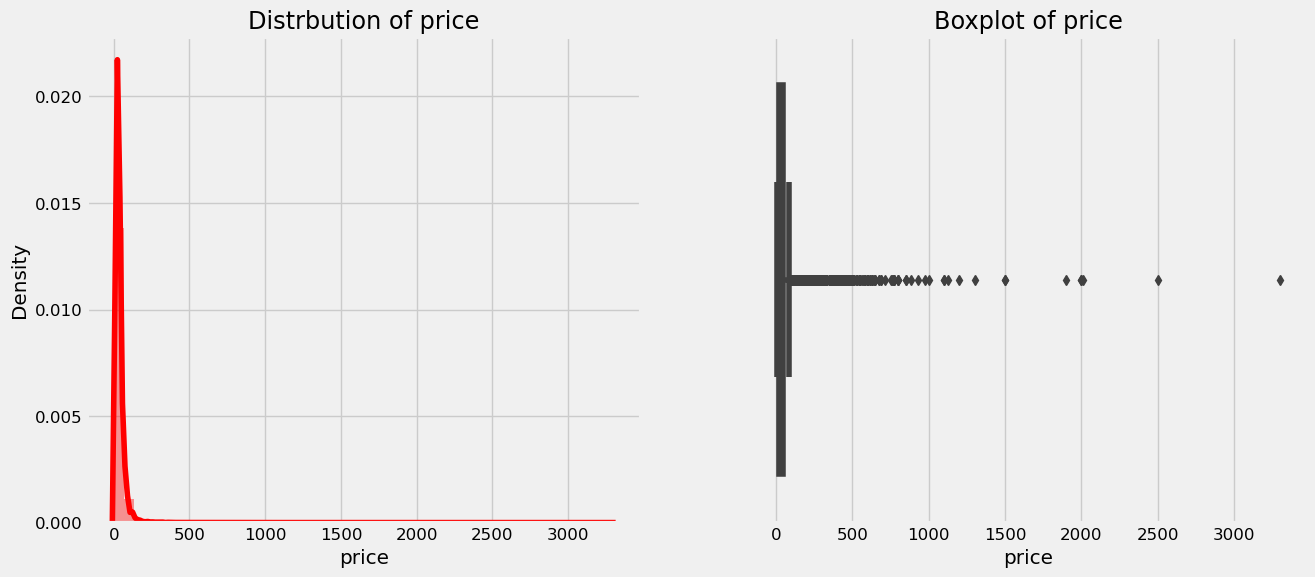

In [288]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(df['price'].fillna(df['price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = df['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

### <font color="Green">12. Relationship between price and points</font>

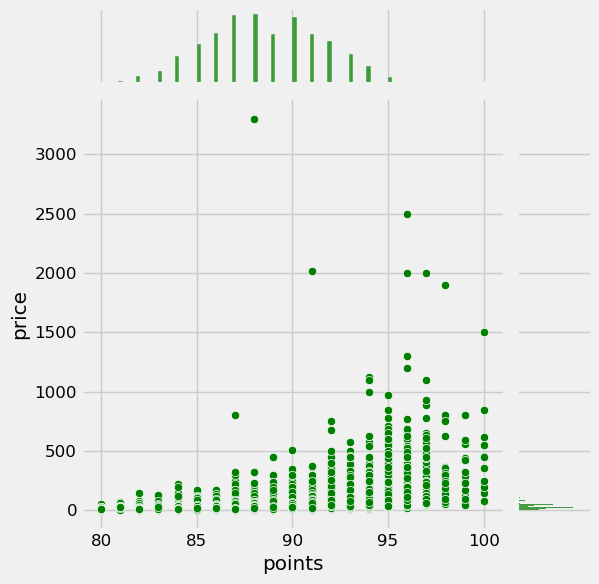

In [289]:
sns.jointplot( x = df['points'],y = df['price'],color='g');

Number of varity of wines 28


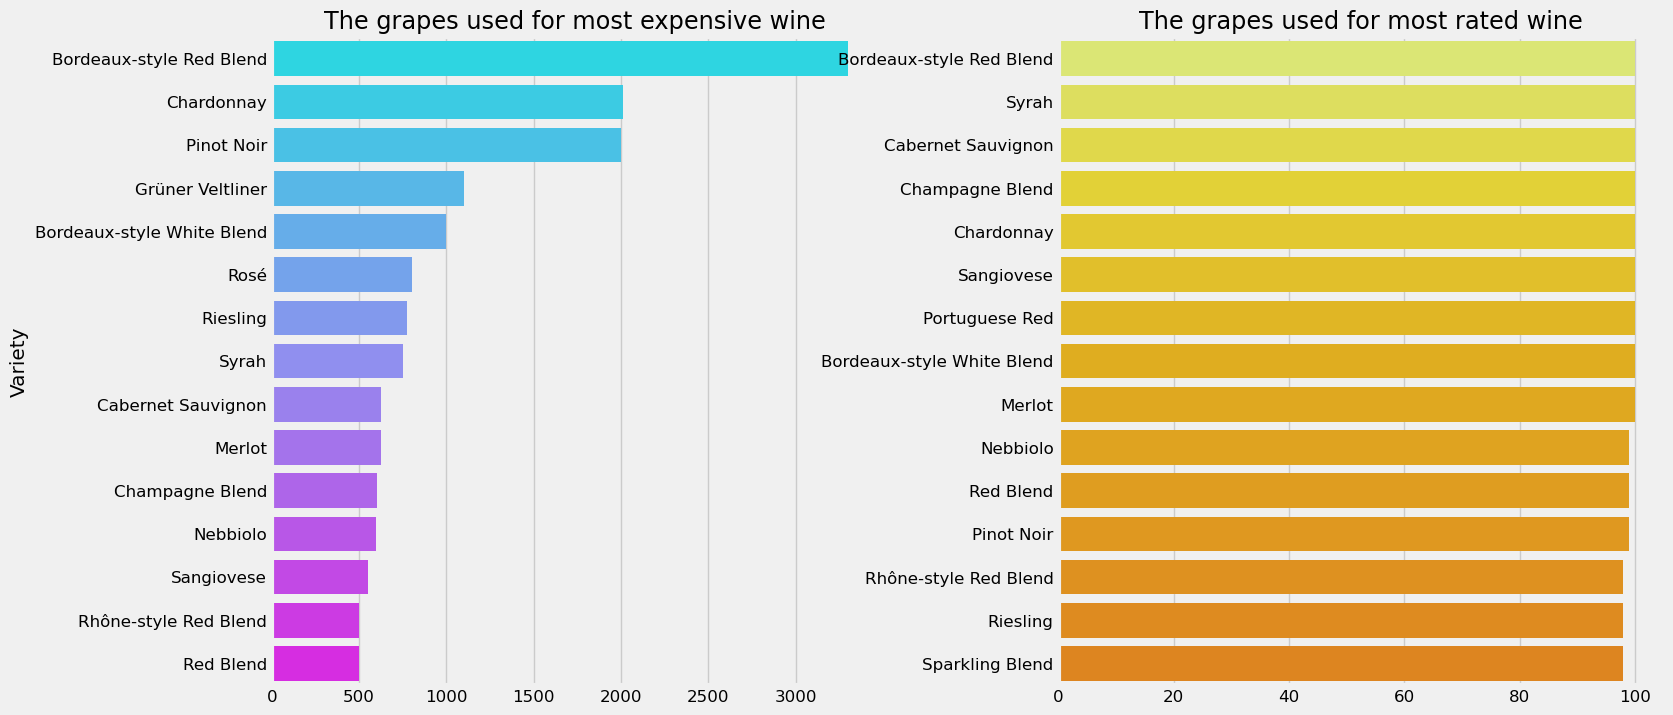

In [290]:
print('Number of varity of wines',df1['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

### <font color="Green">14. Most and Least expensive wine availabe in the province</font>

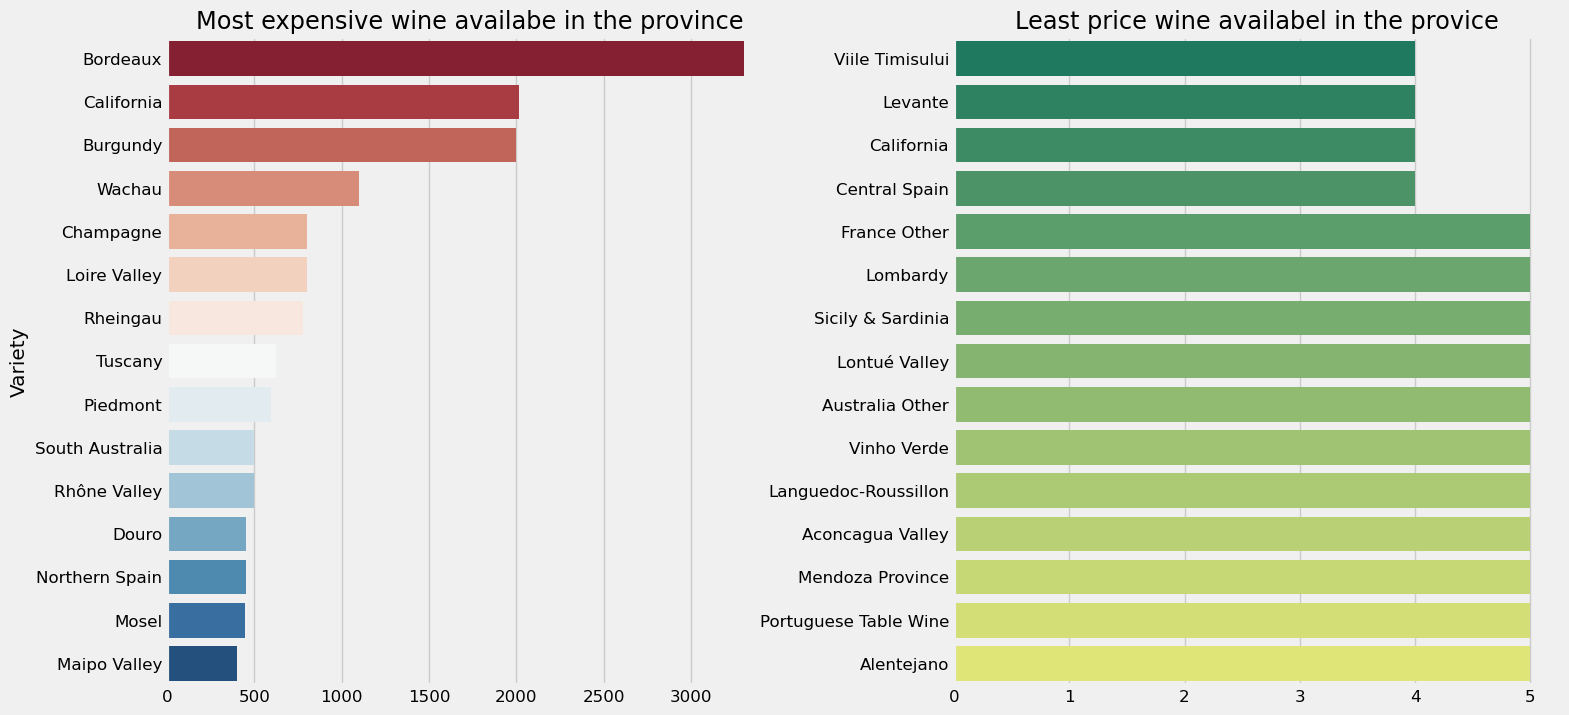

In [291]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine availabe in the province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine availabel in the provice')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

### <font color="Green">15. Region 1</font>

In [292]:
cnt = df.groupby(['country','province','points','region_1',])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace = True)
cnt.style.highlight_max()

,country,province,points,region_1,count,min,max,mean
0,France,Burgundy,96.000000,La Romanée,1,2000.000000,2000.000000,2000.000000
1,France,Bordeaux,98.000000,Margaux,1,1900.000000,1900.000000,1900.000000
2,France,Bordeaux,100.000000,Pauillac,1,1500.000000,1500.000000,1500.000000
3,France,Bordeaux,100.000000,Saint-Émilion,1,1500.000000,1500.000000,1500.000000
4,France,Burgundy,94.000000,La Romanée,1,1125.000000,1125.000000,1125.000000
5,France,Bordeaux,96.000000,Pomerol,3,400.000000,2500.000000,1125.000000
6,France,Bordeaux,97.000000,Pomerol,2,130.000000,2000.000000,1065.000000
7,France,Burgundy,95.000000,Musigny,1,973.000000,973.000000,973.000000
8,France,Bordeaux,100.000000,Pessac-Léognan,1,848.000000,848.000000,848.000000
9,France,Champagne,99.000000,Champagne,1,800.000000,800.000000,800.000000


### <font color="Green">16. Region 2</font>

In [293]:
print('Number of reqion2: ',df['region_2'].nunique())
print('Null values in reqion2: ',df['region_2'].isnull().sum())
cnt = df.groupby(['country','province','region_1','region_2','points'])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace=True)
cnt.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

Number of reqion2:  17
Null values in reqion2:  46704


,country,province,region_1,region_2,points,count,min,max,mean
0,US,California,Sonoma County,Sonoma,97.000000,1,450.000000,450.000000,450.000000
1,US,California,Sonoma County,Sonoma,96.000000,1,450.000000,450.000000,450.000000
2,US,California,Napa Valley,Napa,98.000000,3,250.000000,625.000000,383.333333
3,US,California,Sonoma County,Sonoma,98.000000,1,300.000000,300.000000,300.000000
4,US,California,Napa Valley,Napa,99.000000,2,290.000000,300.000000,295.000000
5,US,California,Green Valley,Sonoma,98.000000,1,250.000000,250.000000,250.000000
6,US,California,Atlas Peak,Napa,99.000000,1,250.000000,250.000000,250.000000
7,US,California,Rutherford,Napa,97.000000,1,250.000000,250.000000,250.000000
8,US,California,St. Helena,Napa,98.000000,3,185.000000,250.000000,228.333333
9,US,California,Stags Leap District,Napa,97.000000,1,225.000000,225.000000,225.000000


### <font color="Green">17. The most expensive  and most rated wine in prepared in the Winery</font>

Number of winerys: 13783


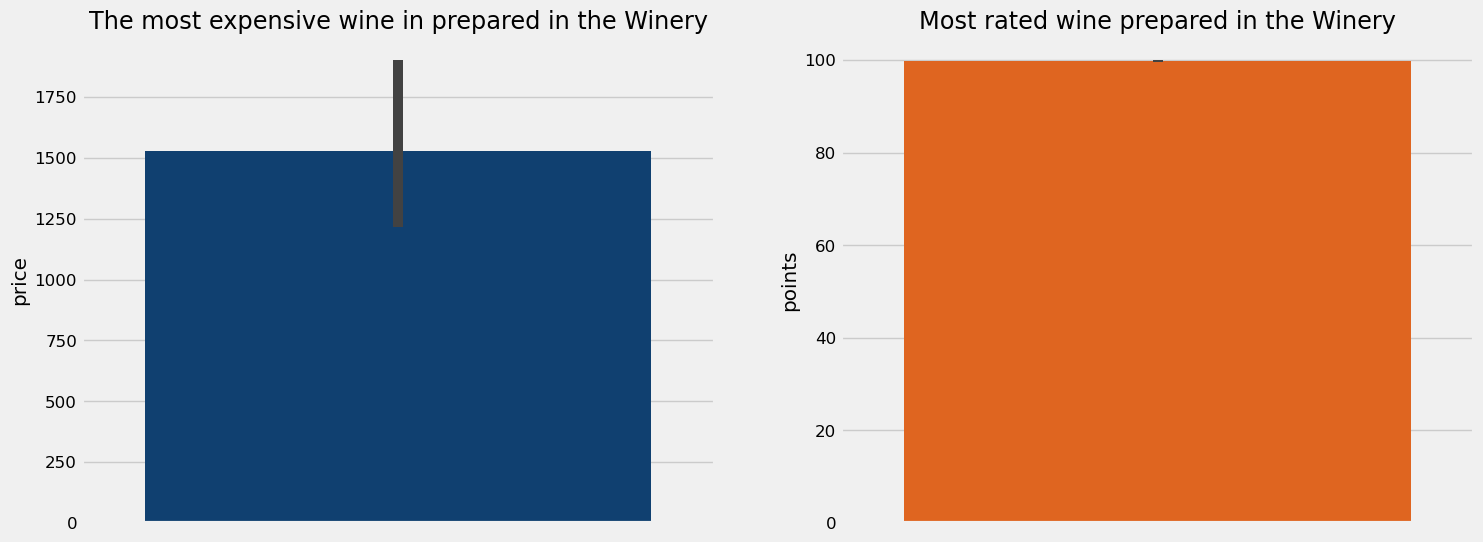

In [294]:
print('Number of winerys:',df['winery'].nunique())
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()
cnt = df.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:15]
sns.barplot(cnt['price'],y = cnt.index,palette = 'ocean',ax = ax1)
ax1.set_title('The most expensive wine in prepared in the Winery')
cnt = df.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'hot')
plt.title('Most rated wine prepared in the Winery');

### <font color="Green">18. Word cloud of Review Title</font>

(-0.5, 399.5, 199.5, -0.5)

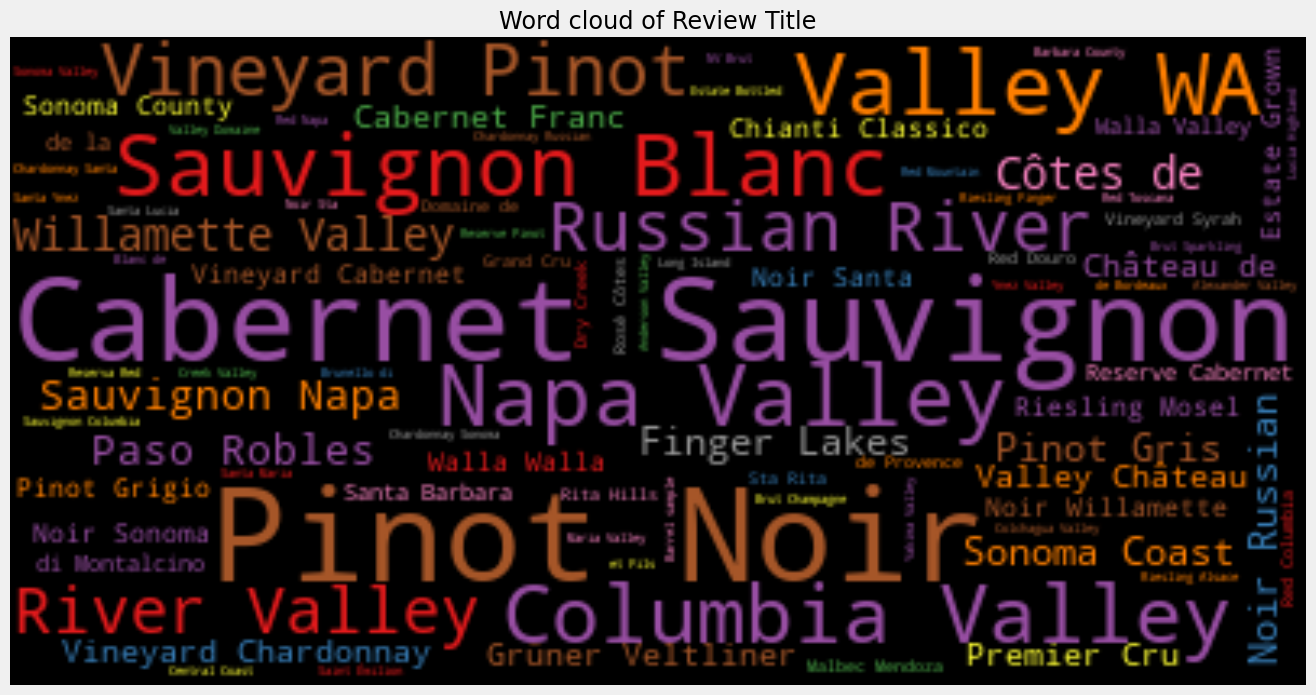

In [295]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Review Title')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(df['review_title']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

### <font color="Green">19. Word cloud of Review Description</font>

(-0.5, 399.5, 199.5, -0.5)

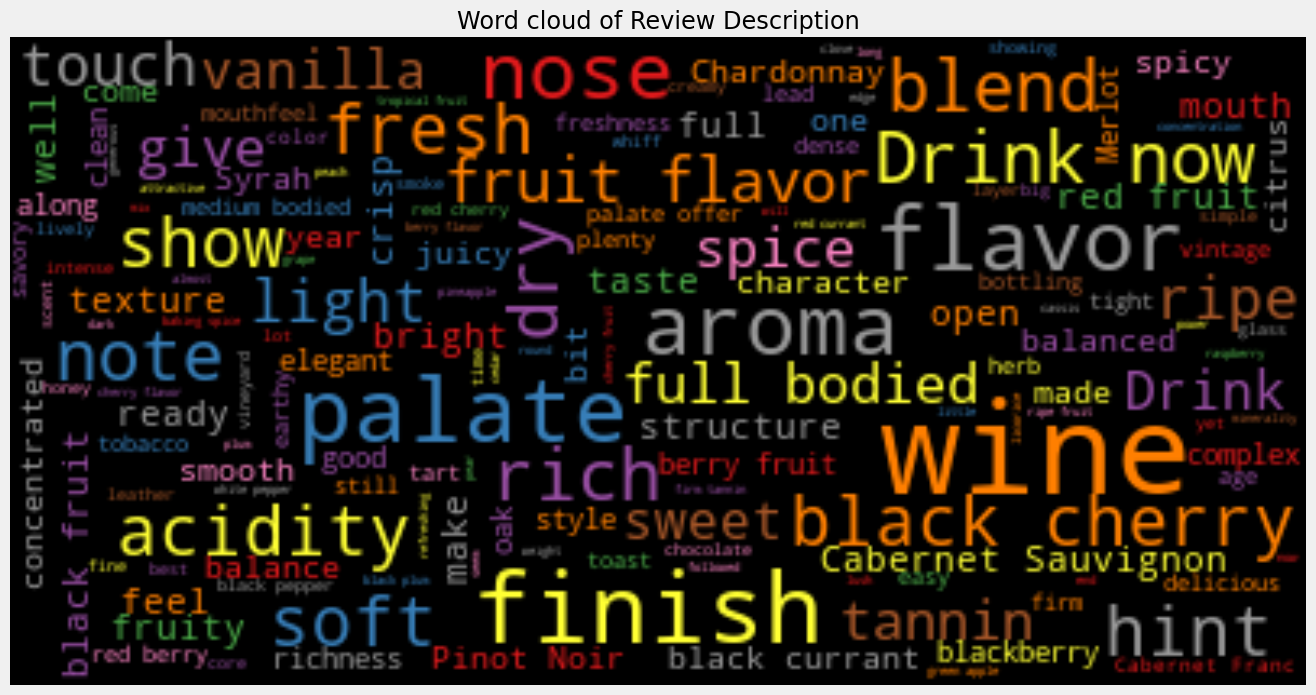

In [296]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Review Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(df['review_description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

### <font color="Green">20. Word cloud of Review Description by Italy</font>

(-0.5, 399.5, 199.5, -0.5)

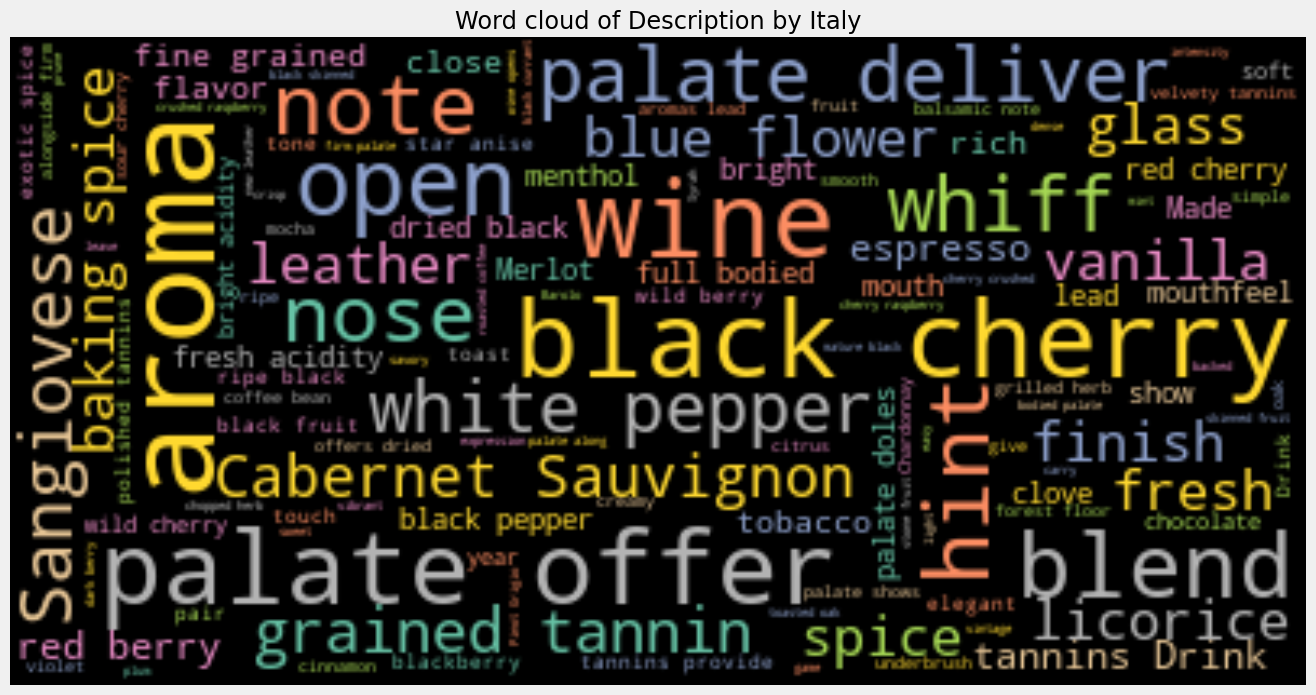

In [297]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description by Italy')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(df[df['country'] =='Italy']['review_description']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')